In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as sm
import statsmodels.api as smf
from scipy.stats import gamma,norm,rayleigh,describe,scoreatpercentile

%matplotlib inline

In [2]:
from utils.Run_LCA_model import Run_LCA_model

In [23]:
buildings_path = '..\shapefiles\\building_block_people_WGS_3_int.csv' 
logistics = 'optimal'
analysis = 'Uncertainty'
acid_type = 'Sulfuric'
n_collection = 1
Result_Energy_m3 = pd.DataFrame()
Result_GHG_m3 = pd.DataFrame()
Result_COST_m3 = pd.DataFrame()
n_regen = 20
for i in range (1000):
    Total_Energy_m3, Total_GHG_m3, Total_COST_m3 = Run_LCA_model(buildings_path, n_regen, n_collection, logistics, analysis, acid_type)
    Result_Energy_m3 = Result_Energy_m3.append(Total_Energy_m3)
    Result_GHG_m3 = Result_GHG_m3.append(Total_GHG_m3)
    Result_COST_m3 = Result_COST_m3.append(Total_COST_m3)
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900


In [24]:
Result_Energy_m3["sum"] = (Result_Energy_m3.sum(axis=1)) - Result_Energy_m3["n_facilities"]
Result_GHG_m3["sum"] = (Result_GHG_m3.sum(axis=1)) - Result_GHG_m3["n_facilities"]
Result_COST_m3["sum"] = (Result_COST_m3.sum(axis=1)) - Result_COST_m3["n_facilities"]

In [25]:
tot_Energy = np.array(Result_Energy_m3["sum"])
tot_GHG = np.array(Result_GHG_m3["sum"])
tot_Cost = np.array(Result_COST_m3["sum"])

In [27]:
var_GHG = describe(tot_GHG)[3]
std_GHG = math.sqrt(var_GHG)
std_GHG

0.721922938695756

In [28]:
var_Energy = describe(tot_Energy)[3]
std_Energy = math.sqrt(var_Energy)
std_Energy

2.953562090051041

In [29]:
var_Cost = describe(tot_Cost)[3]
std_Cost = math.sqrt(var_Cost)
std_Cost

3.670817049687036

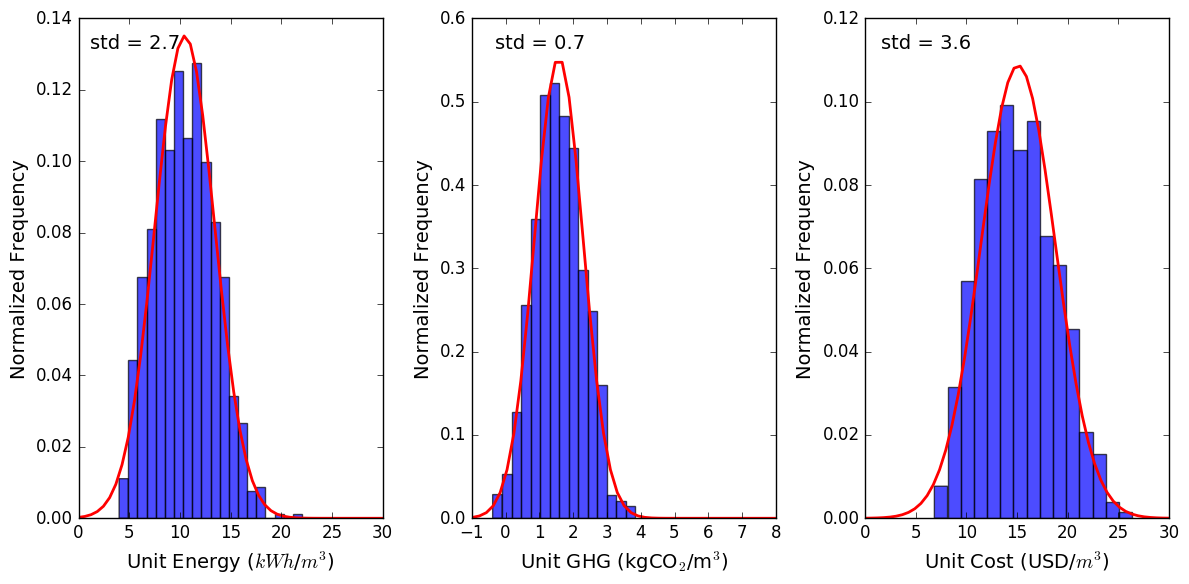

In [49]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,3, 2)
plt.hist(tot_GHG,bins=15,normed=1, alpha = 0.7, color = 'b')
plt.xlabel('Unit GHG (kgCO$_2$/m$^3$)',fontsize=14)
plt.xlim(-1,8)
param = norm.fit(tot_GHG)
x = np.linspace(-2,8)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
plt.plot(x,pdf_fitted,'r-', linewidth = 2)
plt.ylabel("Normalized Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(1, 3, 1)
plt.hist(tot_Energy,bins=20,normed=1, alpha = 0.7, color = 'b')
plt.xlabel('Unit Energy ($kWh$/$m^3$)',fontsize=14)
param2 = norm.fit(tot_Energy)
x2 = np.linspace(0,30)
# fitted distribution
pdf_fitted2 = norm.pdf(x2,loc=param2[0],scale=param2[1])
plt.plot(x2,pdf_fitted2,'r-', linewidth = 2)
plt.ylabel("Normalized Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(1, 3, 3)
plt.hist(tot_Cost,bins=15,normed=1, alpha = 0.7, color = 'b')
plt.xlabel('Unit Cost (USD/$m^3$)',fontsize=14)
param2 = norm.fit(tot_Cost)
x2 = np.linspace(0,30)
# fitted distribution
pdf_fitted2 = norm.pdf(x2,loc=param2[0],scale=param2[1])
plt.plot(x2,pdf_fitted2,'r-', linewidth = 2)
plt.ylabel("Normalized Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(-2.4, 0.95,'std = 2.7', fontsize=14, ha='center', va='center', transform=ax.transAxes)
plt.text(-1.07, 0.95,'std = 0.7', fontsize=14, ha='center', va='center', transform=ax.transAxes)
plt.text(0.2, 0.95,'std = 3.6', fontsize=14, ha='center', va='center', transform=ax.transAxes)
plt.tight_layout()